In [322]:
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from sklearn.metrics import r2_score

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
# upload the csv
bike_df=pd.read_csv('day.csv')

 **Lets view top 5 rows**

In [325]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**now check if there is missing value in dataset and data type of each column**

In [326]:
bike_df.info()
##clearly there is no missing value and there are 730 records in dataset
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observation**
   * instance column is only for index 
   * detday does not contain booking time
   * season, yr,holiday, weekday, working day,weathersit all are categorical variable
   * temp, atemp,hum,windspeed are continuious variable
   
   
 **Now season and weathersit are two categorical variable whose column has spacific meaning, it has given in read me file**  <br /> 
    **season**:=1 for spring
              - 2 for summer 
              - 3 for fall
              - 4 for winter
              
      + weathersit :        
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
        
   **lets convert those into their orignal labels** 
            

In [327]:
season_dict={1:'spring',2:'summer',3:'fall',4:'winter'}

In [328]:
bike_df['season']=bike_df['season'].map(lambda x:season_dict[x])

**now week days also need to convert into actual week days, in hope of specific weekday has any relation of booking**
**by looking at calender we got to know that** </br>
  date->       day->        no given in dataset </br>
  1 jan 2018=> Monday ,        6,  </br>
  2 jan =>     tuesday ,        0,  </br>
  3 jan =>     wednusday,       1.  </br>
  4 jan=>       Tuesday,        2   </br>
  5 jan=>       Friday,         3   </br> 
  6 jan=>       saturday,       4   </br> 
  7 jan=>        sunday,        5   </br> 



In [329]:
day_dict={1:'wed',2:'Thr',3:'Fri',4:'Sat',5:'Sun',6:'Mon',0:'Tue'}

In [330]:
bike_df['weekday']=bike_df['weekday'].map(lambda x:day_dict[x])

In [331]:
weathersit_dict={1:'clear',2:'mist cloudy',3:'light rain',4:'heavy rain'}

In [332]:
bike_df['weathersit']=bike_df['weathersit'].map(lambda x:weathersit_dict[x])

In [333]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Mon,0,mist cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Tue,0,mist cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Thr,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Now mnth is also categorical variable, we need to first convert it actual month name**

In [334]:
month_dict={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [335]:
bike_df['mnth']=bike_df['mnth'].map(lambda x:month_dict[x])

In [336]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,mist cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,mist cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thr,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 **now lets see statistical feature of every column using dataframe describe method** 

In [337]:
bike_df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Now create pair plot for columns** 

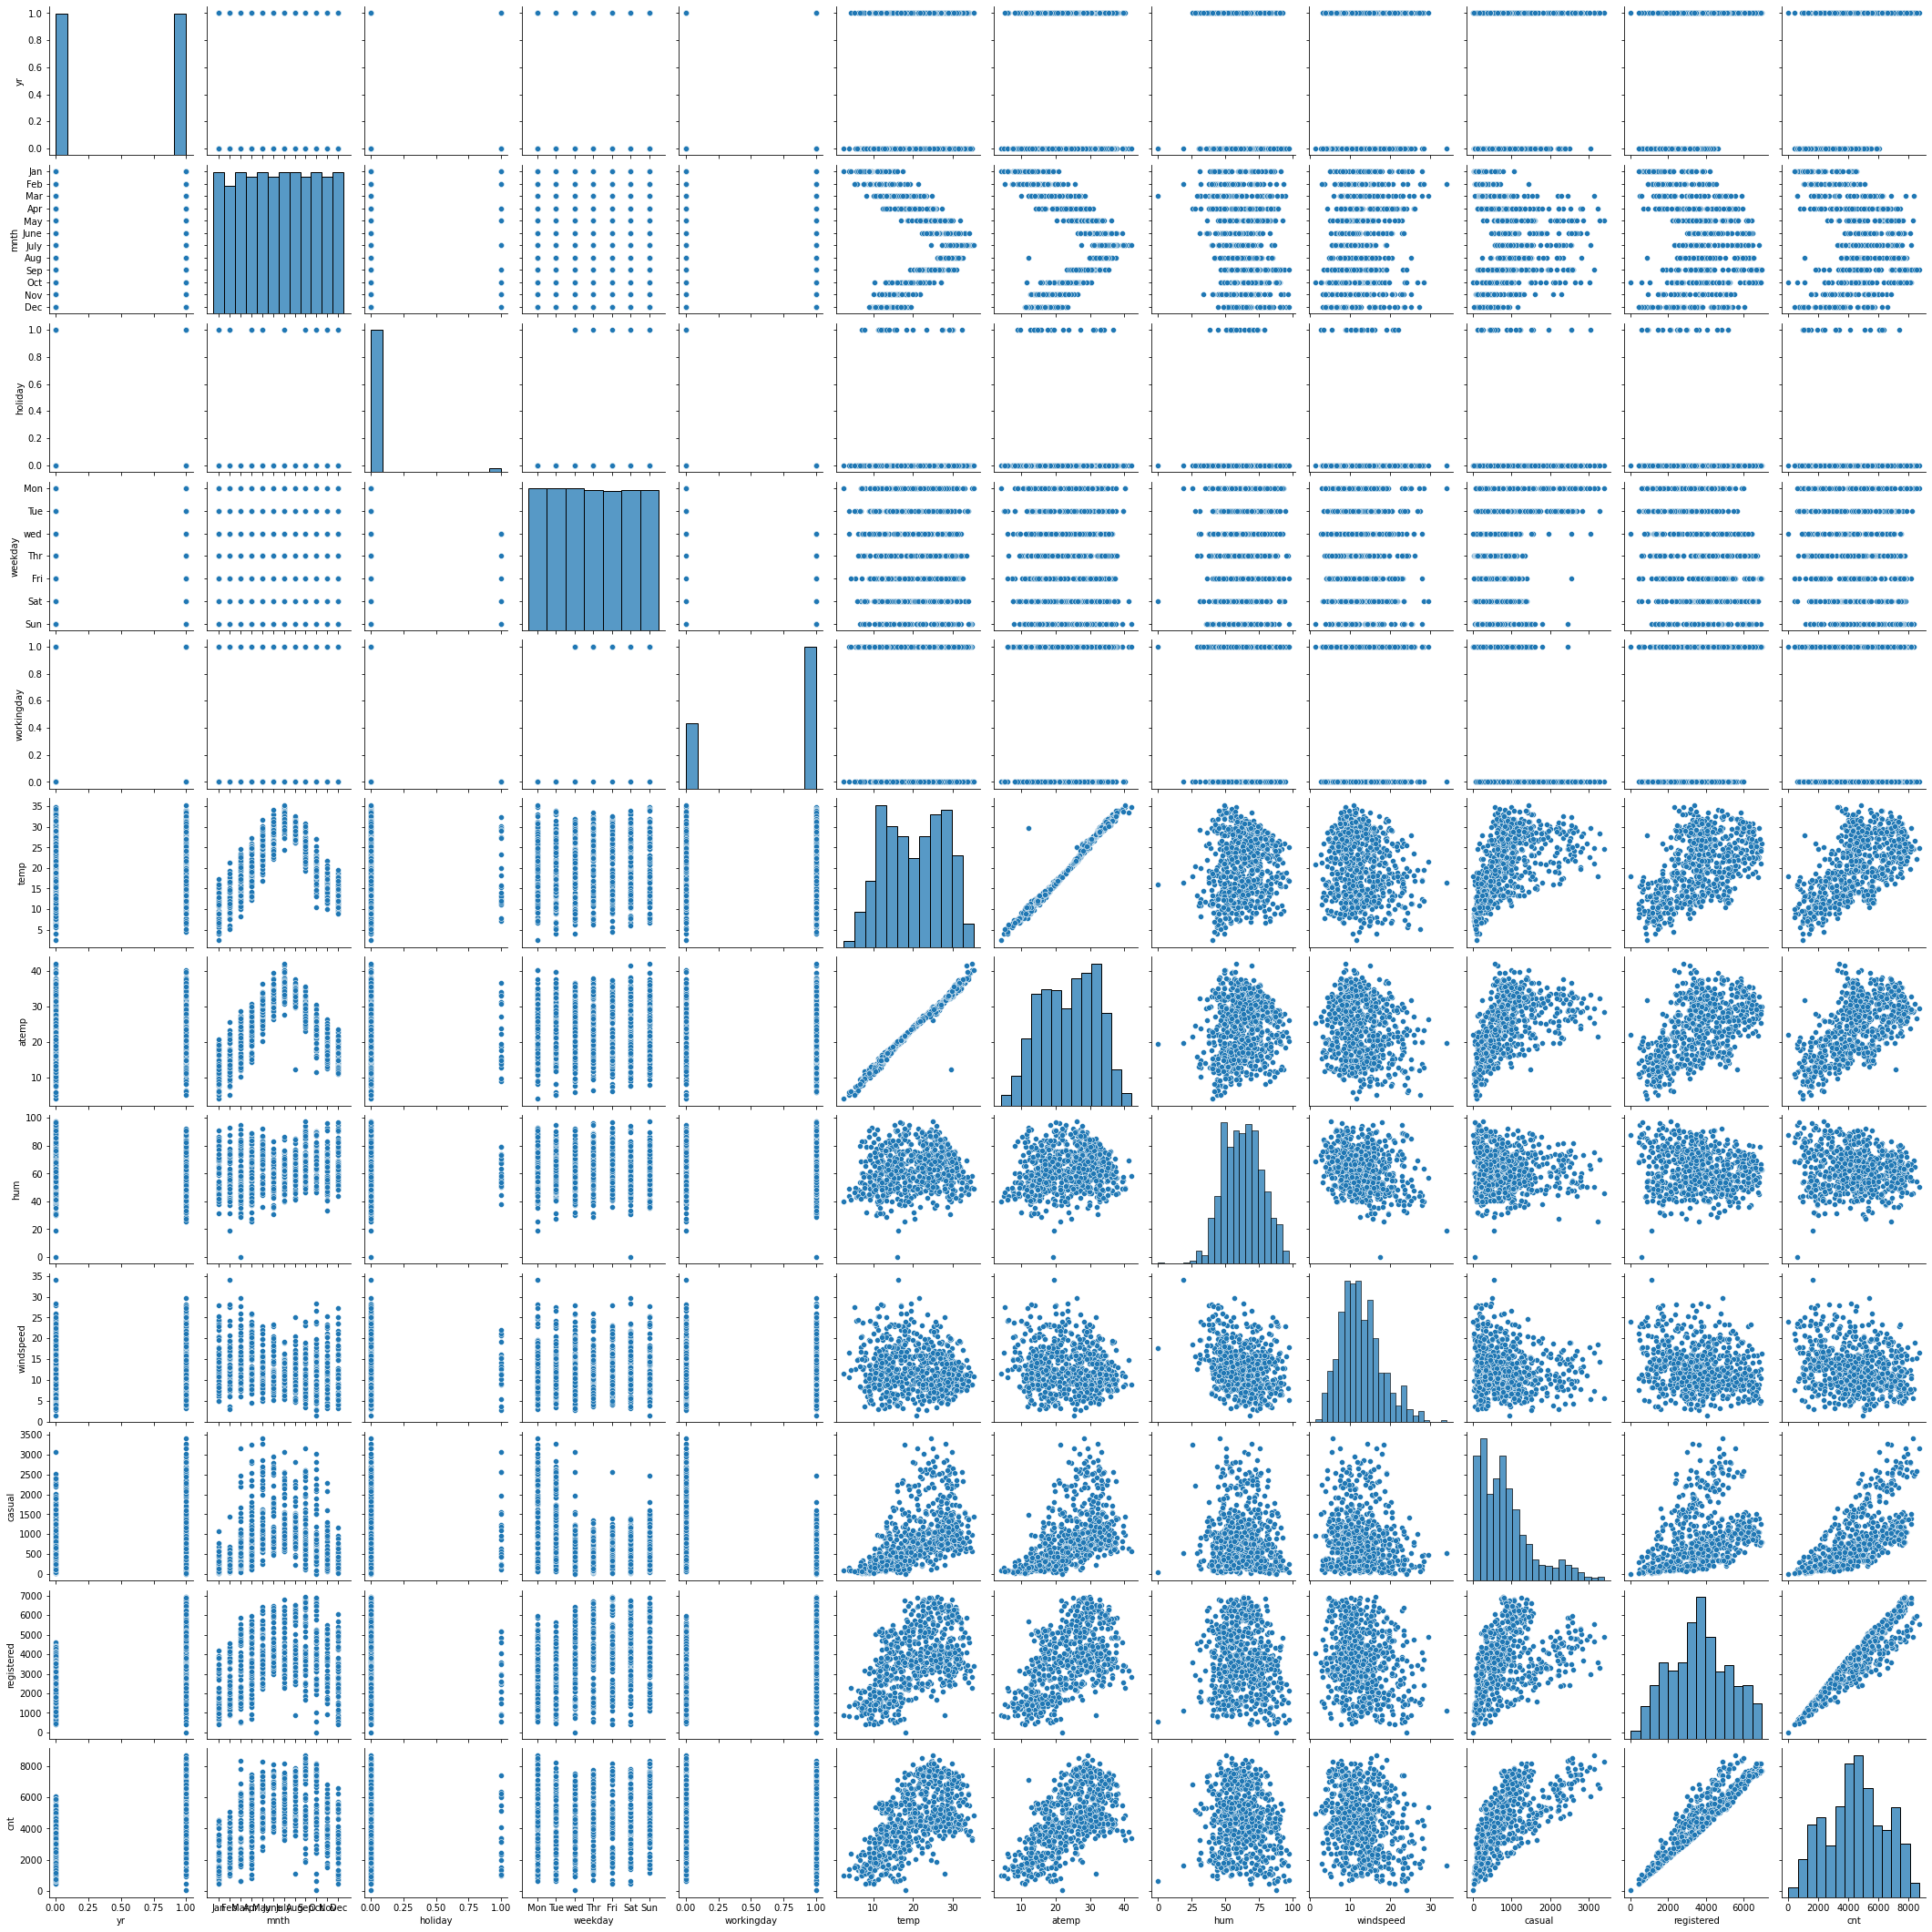

In [338]:
sbn.pairplot(bike_df,vars=['yr','mnth','holiday','weekday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt'])

### Observation : 

  * cnt and temp looks like have linear relationship 
  * temp and atemp have multicollinearity relationship 
  * month and temp , atemp also have some relationship 
  * cnt and causal ,registered has  multicollinearity relationship
  * holiday and cnt has some relationship
  * yr and cnt has some relationship

**lets discard registered and causal,instant,dteday column** </br>
    - we are choseing atemp over temp as atemp is the temprature which people actually feels

In [339]:
bike_df=bike_df.drop(['registered','casual','instant','dteday','temp'],axis=1)

**now create box plot to do univariate analysis for categorical variables**

<AxesSubplot:xlabel='season', ylabel='cnt'>

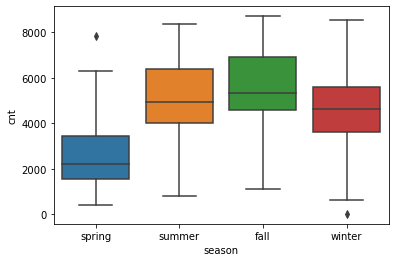

In [340]:
sbn.boxplot(x='season',y='cnt',data=bike_df)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

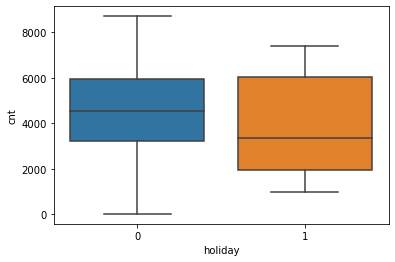

In [341]:
sbn.boxplot(x='holiday',y='cnt',data=bike_df)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

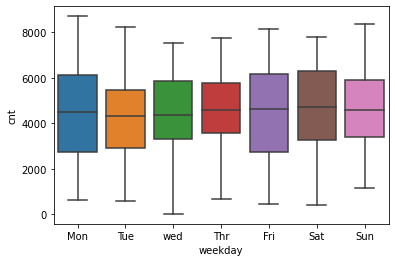

In [342]:
sbn.boxplot(x='weekday',y='cnt',data=bike_df)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

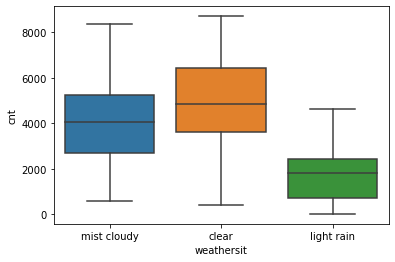

In [343]:
sbn.boxplot(x='weathersit',y='cnt',data=bike_df)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

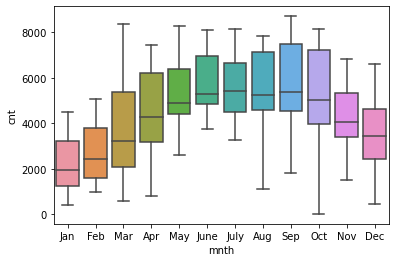

In [344]:
sbn.boxplot(x='mnth',y='cnt',data=bike_df)

# 2. Preparing data for modeling 
       -converting catogorical variable into dummy var

In [345]:
seasons=pd.get_dummies(bike_df['season'],drop_first=True)

In [346]:
bike_df=pd.concat((bike_df,seasons),axis=1)

In [347]:
bike_df=bike_df.drop('season',axis=1)

In [348]:
weathersit=pd.get_dummies(bike_df['weathersit'],drop_first=True)

In [349]:
weekday=pd.get_dummies(bike_df['weekday'],drop_first=True)
bike_df=pd.concat((bike_df,weekday),axis=1)
bike_df=bike_df.drop('weekday',axis=1)

In [350]:
bike_df=pd.concat((bike_df,weathersit),axis=1)

In [351]:
bike_df=bike_df.drop('weathersit',axis=1)

In [352]:
# dummies crete for month
mnth=pd.get_dummies(bike_df['mnth'],drop_first=True)
bike_df=pd.concat((bike_df,mnth),axis=1)
bike_df=bike_df.drop('mnth',axis=1)

In [353]:
bike_df

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,11.33210,65.2917,23.458911,2114,1,0,0,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,12.75230,59.0000,10.416557,3095,1,0,0,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,12.12000,75.2917,8.333661,1341,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.58500,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [354]:
df_train,df_test=train_test_split(bike_df,test_size=0.30,random_state=42)

**Normalizing continuous variable because they are different scale** </br>
  we are going to do min max scaling 

In [355]:
from sklearn.preprocessing import MinMaxScaler

In [356]:
scaler = MinMaxScaler()
var=['atemp','hum','windspeed']
df_train[var]=scaler.fit_transform(df_train[var])

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [357]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
683,1,0,1,0.322150,0.639330,0.327101,5445,0,0,1,...,0,0,0,0,0,0,0,1,0,0
645,1,1,0,0.404998,0.731215,0.419004,5478,0,0,1,...,0,0,0,0,0,0,0,0,1,0
163,0,0,1,0.685963,0.509660,0.708724,5020,0,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.326273,0.785745,0.415925,1162,1,0,0,...,1,0,0,0,0,0,0,0,0,0
640,1,0,1,0.682653,0.817947,0.110593,7572,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## model building
  -we will be following top down approach where we will build model with all independent variable and then drop which was not helpful or not significant 

In [358]:
X_train=df_train.loc[:,~df_train.columns.isin(['cnt'])]


In [359]:
y_train=df_train.pop('cnt')

In [360]:
y_train

683    5445
645    5478
163    5020
360    1162
640    7572
       ... 
71     2417
106    3744
270    3907
435    5298
102    2162
Name: cnt, Length: 511, dtype: int64

### now add constant explicitly as statsmodel does not going to do it. 

In [361]:
X_train_sm=sm.add_constant(X_train)

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [362]:
X_train_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
683,1.0,1,0,1,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,1,0,0
645,1.0,1,1,0,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,0,0,0,1,0
163,1.0,0,0,1,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,1,0,0,0,0,0
360,1.0,0,0,1,0.326273,0.785745,0.415925,1,0,0,...,1,0,0,0,0,0,0,0,0,0
640,1.0,1,0,1,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [363]:
lr=sm.OLS(y_train,X_train_sm)

In [364]:
lr_model=lr.fit()

In [365]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.65
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.31e-178
Time:                        09:04:05   Log-Likelihood:                -4111.7
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     483   BIC:                             8398.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2311.5614    326.898      7.071      0.000    1669.244    2953.879
yr           1956.1275     70.705     27.666      0.000    1817.200    2095.055
holiday       205.9325    206.178      0.999      0.318    -199.184     611.049
workingday    808.2525    111.355      7.258      0.000     589.452    1027.053
atemp        3836.8208    412.155      9.309      0.000    3026.983    4646.658
hum         -1382.5402    341.870     -4.044      0.000   -2054.275    -710.805
windspeed    -892.5603    207.607     -4.299      0.000   -1300.484    -484.636
spring      -1219.5335    269.922     -4.518      0.000   -1749.899    -689.168
summer         84.0981    224.629      0.374      0.708    -357.273     525.469
winter        635.1101    229.577      2.766      0.006     184.016    1086.204
Mon           843.7416    121.066      6.969      0.000     605.861    1081.622
Sat            17.2000    130.265      0.132      0.895    -238.755     273.155
Sun            72.6158    134.207      0.541      0.589    -191.087     336.318
Thr          -151.1795    132.801     -1.138      0.256    -412.119     109.760
Tue           453.6349    124.252      3.651      0.000     209.494     697.776
wed           -95.0697    133.764     -0.711      0.478    -357.900     167.761
light rain  -1856.8376    236.094     -7.865      0.000   -2320.736   -1392.939
mist cloudy  -481.1910     92.168     -5.221      0.000    -662.291    -300.091
Aug           -16.6495    292.851     -0.057      0.955    -592.068     558.769
Dec          -312.9858    300.580     -1.041      0.298    -903.591     277.620
Feb           147.4736    305.264      0.483      0.629    -452.335     747.282
Jan            26.2564    310.870      0.084      0.933    -584.569     637.082
July         -290.0329    295.737     -0.981      0.327    -871.123     291.058
June           77.0524    204.515      0.377      0.707    -324.796     478.901
Mar           478.1313    239.318      1.998      0.046       7.899     948.364
May           300.7896    174.245      1.726      0.085     -41.582     643.162
Nov          -415.1926    318.784     -1.302      0.193   -1041.568     211.182
Oct           335.6849    313.742      1.070      0.285    -280.783     952.152
Sep           672.7274    273.657      2.458      0.014     135.022    1210.433
==============================================================================
Omnibus:                       86.500   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.257
Skew:                          -0.873   Prob(JB):                     9.88e-46
Kurtosis:                       5.586   Cond. No.                     2.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covar

**by looking above summary R-squre and Adjusted R squere is in range of 0.8 which is good, all weekdays has higher P value 
except monday and tuesday but VIF values are low for those ,some months also have high P value lets remove Aug in P value ** 

In [366]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

In [367]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,96.33
13,Tue,21.92
9,Mon,21.15
6,spring,10.95
8,winter,8.37
7,summer,8.18
25,Nov,7.18
26,Oct,6.82
20,Jan,6.57
3,atemp,6.51


In [368]:
## by seeing above VIF and P values look like week day is not contributing much to explain bookings except week day 6 , so atleast we
## remove week days 1 to 5 

In [369]:
X_train=df_train.loc[:,~df_train.columns.isin(['Aug'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
683,1.0,1,0,1,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,1,0,0
645,1.0,1,1,0,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,0,0,0,1,0
163,1.0,0,0,1,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,1,0,0,0,0,0
360,1.0,0,0,1,0.326273,0.785745,0.415925,1,0,0,...,1,0,0,0,0,0,0,0,0,0
640,1.0,1,0,1,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [370]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.24e-179
Time:                        09:04:13   Log-Likelihood:                -4111.7
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     484   BIC:                             8392.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2303.6852    295.786      7.788      0.000    1722.502    2884.869
yr           1956.2542     70.597     27.710      0.000    1817.539    2094.969
holiday       204.0934    203.415      1.003      0.316    -195.592     603.778
workingday    806.3498    106.098      7.600      0.000     597.881    1014.819
atemp        3830.9686    398.683      9.609      0.000    3047.606    4614.331
hum         -1381.9123    341.339     -4.049      0.000   -2052.602    -711.223
windspeed    -891.6903    206.829     -4.311      0.000   -1298.083    -485.297
spring      -1214.0427    251.792     -4.822      0.000   -1708.783    -719.302
summer         93.3800    154.127      0.606      0.545    -209.460     396.220
winter        638.0789    223.329      2.857      0.004     199.264    1076.894
Mon           841.8230    116.147      7.248      0.000     613.608    1070.038
Sat            17.3459    130.105      0.133      0.894    -238.295     272.986
Sun            72.2911    133.948      0.540      0.590    -190.900     335.482
Thr          -151.1982    132.664     -1.140      0.255    -411.867     109.470
Tue           451.4191    117.860      3.830      0.000     219.839     682.999
wed           -95.1834    133.611     -0.712      0.477    -357.712     167.345
light rain  -1857.1587    235.783     -7.877      0.000   -2320.444   -1393.874
mist cloudy  -481.4602     91.951     -5.236      0.000    -662.133    -300.787
Dec          -305.8896    273.158     -1.120      0.263    -842.611     230.832
Feb           152.7870    290.306      0.526      0.599    -417.629     723.203
Jan            31.1186    298.567      0.104      0.917    -555.530     617.767
July         -276.1137    165.723     -1.666      0.096    -601.739      49.512
June           84.2565    160.364      0.525      0.600    -230.839     399.352
Mar           482.7865    224.643      2.149      0.032      41.390     924.183
May           304.3615    162.357      1.875      0.061     -14.650     623.373
Nov          -406.8231    282.466     -1.440      0.150    -961.834     148.188
Oct           344.9520    267.801      1.288      0.198    -181.244     871.148
Sep           684.9986    168.057      4.076      0.000     354.787    1015.210
==============================================================================
Omnibus:                       86.531   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.518
Skew:                          -0.873   Prob(JB):                     8.67e-46
Kurtosis:                       5.588   Cond. No.                     2.29e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue i

In [371]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,79.58
13,Tue,17.85
9,Mon,17.36
6,spring,9.55
8,winter,7.94
3,atemp,6.10
19,Jan,6.07
24,Nov,5.65
25,Oct,4.98
18,Feb,4.92


In [372]:
# lets remove 'Jan' also as it has high P value

In [373]:
X_train=X_train.loc[:,~X_train.columns.isin(['Jan'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.15e-180
Time:                        09:04:15   Log-Likelihood:                -4111.7
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     485   BIC:                             8385.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2314.1597    277.906      8.327      0.000    1768.110    2860.209
yr           1956.8716     70.276     27.845      0.000    1818.788    2094.956
holiday       207.3184    200.843      1.032      0.302    -187.311     601.947
workingday    809.0477    102.787      7.871      0.000     607.086    1011.010
atemp        3812.7433    357.923     10.652      0.000    3109.472    4516.014
hum         -1377.7973    338.702     -4.068      0.000   -2043.302    -712.292
windspeed    -892.9380    206.271     -4.329      0.000   -1298.234    -487.642
spring      -1198.7321    204.292     -5.868      0.000   -1600.139    -797.325
summer         90.9925    152.259      0.598      0.550    -208.177     390.162
winter        646.0395    209.649      3.082      0.002     234.107    1057.972
Mon           844.4289    113.309      7.452      0.000     621.793    1067.065
Sat            17.8061    129.897      0.137      0.891    -237.425     273.037
Sun            72.3771    133.809      0.541      0.589    -190.539     335.293
Thr          -151.0603    132.522     -1.140      0.255    -411.449     109.328
Tue           453.3647    116.253      3.900      0.000     224.943     681.787
wed           -95.8194    133.335     -0.719      0.473    -357.805     166.167
light rain  -1858.6660    235.099     -7.906      0.000   -2320.605   -1396.727
mist cloudy  -482.3253     91.483     -5.272      0.000    -662.076    -302.574
Dec          -326.1493    191.719     -1.701      0.090    -702.851      50.553
Feb           127.8398    164.108      0.779      0.436    -194.610     450.290
July         -276.6087    165.486     -1.671      0.095    -601.767      48.549
June           84.2373    160.200      0.526      0.599    -230.535     399.010
Mar           466.6044    162.189      2.877      0.004     147.924     785.285
May           302.9619    161.635      1.874      0.061     -14.630     620.554
Nov          -423.1622    234.731     -1.803      0.072    -884.378      38.054
Oct           331.1762    232.674      1.423      0.155    -125.997     788.350
Sep           679.5049    159.414      4.263      0.000     366.277     992.733
==============================================================================
Omnibus:                       86.645   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.272
Skew:                          -0.873   Prob(JB):                     5.95e-46
Kurtosis:                       5.594   Cond. No.                     2.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-28. This might indicate that there are
strong multicollinearity problems

In [374]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,70.51
13,Tue,16.01
9,Mon,15.35
8,winter,7.01
6,spring,6.30
3,atemp,4.93
1,holiday,4.03
23,Nov,3.91
24,Oct,3.77
7,summer,3.77


**now lets remove Saturday also which has higher P value in remaining columns**

In [375]:
X_train=X_train.loc[:,~X_train.columns.isin(['Sat'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.02e-181
Time:                        09:04:19   Log-Likelihood:                -4111.7
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     486   BIC:                             8379.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2320.2260    274.083      8.465      0.000    1781.692    2858.760
yr           1957.0323     70.196     27.880      0.000    1819.108    2094.957
holiday       213.9950    194.650      1.099      0.272    -168.465     596.455
workingday    814.8938     93.427      8.722      0.000     631.324     998.464
atemp        3813.1932    357.546     10.665      0.000    3110.665    4515.721
hum         -1383.1414    336.111     -4.115      0.000   -2043.552    -722.731
windspeed    -892.8914    206.063     -4.333      0.000   -1297.775    -488.008
spring      -1198.6709    204.085     -5.873      0.000   -1599.669    -797.673
summer         90.8345    152.101      0.597      0.551    -208.023     389.692
winter        646.9920    209.322      3.091      0.002     235.704    1058.280
Mon           841.1891    110.704      7.599      0.000     623.671    1058.707
Sun            63.2098    115.780      0.546      0.585    -164.282     290.702
Thr          -159.9937    115.274     -1.388      0.166    -386.490      66.503
Tue           450.1482    113.745      3.958      0.000     226.655     673.642
wed          -105.0696    114.882     -0.915      0.361    -330.796     120.657
light rain  -1859.1498    234.835     -7.917      0.000   -2320.568   -1397.732
mist cloudy  -481.4775     91.181     -5.280      0.000    -660.636    -302.320
Dec          -326.2853    191.523     -1.704      0.089    -702.600      50.029
Feb           127.3577    163.904      0.777      0.438    -194.691     449.406
July         -276.9331    165.302     -1.675      0.095    -601.728      47.862
June           85.1007    159.915      0.532      0.595    -229.109     399.310
Mar           466.4430    162.021      2.879      0.004     148.094     784.792
May           302.6487    161.456      1.874      0.061     -14.589     619.887
Nov          -423.5217    234.480     -1.806      0.072    -884.241      37.198
Oct           330.2771    232.347      1.421      0.156    -126.251     786.805
Sep           679.3102    159.247      4.266      0.000     366.413     992.208
==============================================================================
Omnibus:                       86.532   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.579
Skew:                          -0.873   Prob(JB):                     8.41e-46
Kurtosis:                       5.589   Cond. No.                     2.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [376]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,66.22
12,Tue,15.95
9,Mon,15.30
8,winter,7.00
6,spring,6.30
3,atemp,4.93
22,Nov,3.91
1,holiday,3.83
23,Oct,3.77
7,summer,3.77


**now remove 'June' from training data as it has high P value**

In [377]:
X_train=X_train.loc[:,~X_train.columns.isin(['June'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.11e-182
Time:                        09:04:23   Log-Likelihood:                -4111.8
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     487   BIC:                             8373.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2307.1502    272.778      8.458      0.000    1771.182    2843.118
yr           1954.5624     69.991     27.926      0.000    1817.042    2092.083
holiday       206.9493    194.057      1.066      0.287    -174.342     588.241
workingday    811.4400     93.132      8.713      0.000     628.449     994.431
atemp        3891.1948    325.882     11.941      0.000    3250.887    4531.502
hum         -1409.5881    332.172     -4.244      0.000   -2062.256    -756.920
windspeed    -901.2223    205.316     -4.389      0.000   -1304.637    -497.808
spring      -1180.0879    200.928     -5.873      0.000   -1574.880    -785.296
summer        113.5046    145.906      0.778      0.437    -173.179     400.188
winter        654.7516    208.660      3.138      0.002     244.767    1064.736
Mon           841.2074    110.623      7.604      0.000     623.851    1058.564
Sun            64.6911    115.662      0.559      0.576    -162.566     291.949
Thr          -156.7173    115.024     -1.362      0.174    -382.723      69.288
Tue           447.5535    113.557      3.941      0.000     224.431     670.676
wed          -102.6857    114.710     -0.895      0.371    -328.073     122.702
light rain  -1851.3932    234.210     -7.905      0.000   -2311.580   -1391.206
mist cloudy  -478.0428     90.885     -5.260      0.000    -656.619    -299.467
Dec          -327.6667    191.364     -1.712      0.087    -703.668      48.334
Feb           121.0070    163.349      0.741      0.459    -199.949     441.963
July         -305.1883    156.428     -1.951      0.052    -612.544       2.168
Mar           449.0904    158.589      2.832      0.005     137.487     760.694
May           266.7682    146.596      1.820      0.069     -21.271     554.807
Nov          -425.3519    234.282     -1.816      0.070    -885.680      34.976
Oct           317.8532    231.001      1.376      0.169    -136.028     771.734
Sep           662.3341    155.904      4.248      0.000     356.006     968.662
==============================================================================
Omnibus:                       85.534   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.045
Skew:                          -0.867   Prob(JB):                     8.12e-45
Kurtosis:                       5.555   Cond. No.                     2.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [378]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,65.67
12,Tue,15.84
9,Mon,15.22
8,winter,6.97
6,spring,6.11
3,atemp,4.10
21,Nov,3.91
1,holiday,3.80
22,Oct,3.73
7,summer,3.48


**now we can remove 'Sun' as next higher P value candidate**

In [379]:
X_train=X_train.loc[:,~X_train.columns.isin(['Sun'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.20e-183
Time:                        09:04:26   Log-Likelihood:                -4112.0
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     488   BIC:                             8367.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2310.9744    272.501      8.481      0.000    1775.555    2846.394
yr           1956.6534     69.841     28.016      0.000    1819.426    2093.880
holiday       219.1606    192.689      1.137      0.256    -159.441     597.762
workingday    822.1328     91.085      9.026      0.000     643.166    1001.100
atemp        3890.3592    325.649     11.946      0.000    3250.513    4530.206
hum         -1403.5920    331.765     -4.231      0.000   -2055.457    -751.727
windspeed    -901.2282    205.171     -4.393      0.000   -1304.356    -498.100
spring      -1176.0543    200.657     -5.861      0.000   -1570.312    -781.797
summer        115.8387    145.744      0.795      0.427    -170.524     402.202
winter        656.6891    208.484      3.150      0.002     247.052    1066.326
Mon           831.9300    109.295      7.612      0.000     617.183    1046.677
Thr          -176.8597    109.164     -1.620      0.106    -391.350      37.631
Tue           437.7510    112.118      3.904      0.000     217.458     658.044
wed          -123.6299    108.349     -1.141      0.254    -336.519      89.259
light rain  -1861.3942    233.362     -7.976      0.000   -2319.912   -1402.876
mist cloudy  -477.5965     90.818     -5.259      0.000    -656.039    -299.154
Dec          -331.6324    191.098     -1.735      0.083    -707.109      43.844
Feb           117.3226    163.101      0.719      0.472    -203.145     437.790
July         -303.5045    156.288     -1.942      0.053    -610.586       3.577
Mar           446.7159    158.421      2.820      0.005     135.445     757.987
May           266.2936    146.490      1.818      0.070     -21.536     554.123
Nov          -424.9614    234.116     -1.815      0.070    -884.961      35.038
Oct           316.2191    230.819      1.370      0.171    -137.303     769.742
Sep           661.8757    155.792      4.248      0.000     355.769     967.982
==============================================================================
Omnibus:                       85.205   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.186
Skew:                          -0.864   Prob(JB):                     1.25e-44
Kurtosis:                       5.551   Cond. No.                     2.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [380]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,65.29
11,Tue,15.83
9,Mon,15.21
8,winter,6.97
6,spring,6.11
3,atemp,4.10
20,Nov,3.91
1,holiday,3.78
21,Oct,3.73
7,summer,3.47


**now next to remove is  Feb with high P value greater than 0.05**

In [381]:
X_train=X_train.loc[:,~X_train.columns.isin(['Feb'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.46e-184
Time:                        09:04:29   Log-Likelihood:                -4112.3
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     489   BIC:                             8362.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2311.4996    272.365      8.487      0.000    1776.349    2846.650
yr           1958.1161     69.777     28.062      0.000    1821.016    2095.217
holiday       214.7562    192.496      1.116      0.265    -163.466     592.978
workingday    824.3824     90.986      9.061      0.000     645.610    1003.155
atemp        3893.4836    325.459     11.963      0.000    3254.013    4532.954
hum         -1405.1248    331.595     -4.237      0.000   -2056.651    -753.598
windspeed    -901.6181    205.069     -4.397      0.000   -1304.544    -498.692
spring      -1130.6838    190.392     -5.939      0.000   -1504.771    -756.597
summer        117.2697    145.658      0.805      0.421    -168.924     403.463
winter        679.0207    206.058      3.295      0.001     274.153    1083.889
Mon           832.5189    109.238      7.621      0.000     617.885    1047.153
Thr          -176.1076    109.106     -1.614      0.107    -390.481      38.266
Tue           439.8421    112.025      3.926      0.000     219.733     659.951
wed          -125.1764    108.274     -1.156      0.248    -337.917      87.564
light rain  -1859.0417    233.224     -7.971      0.000   -2317.286   -1400.797
mist cloudy  -479.0971     90.749     -5.279      0.000    -657.404    -300.791
Dec          -365.1163    185.250     -1.971      0.049    -729.101      -1.131
July         -307.8196    156.096     -1.972      0.049    -614.522      -1.118
Mar           414.8392    152.021      2.729      0.007     116.143     713.535
May           261.6039    146.273      1.788      0.074     -25.797     549.005
Nov          -449.8066    231.440     -1.944      0.053    -904.546       4.932
Oct           291.0842    228.047      1.276      0.202    -156.988     739.156
Sep           652.6380    155.185      4.206      0.000     347.726     957.550
==============================================================================
Omnibus:                       85.437   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.140
Skew:                          -0.867   Prob(JB):                     1.28e-44
Kurtosis:                       5.546   Cond. No.                     2.25e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.16e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [382]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,65.28
11,Tue,15.83
9,Mon,15.21
8,winter,6.81
6,spring,5.50
3,atemp,4.10
19,Nov,3.82
1,holiday,3.78
20,Oct,3.64
7,summer,3.47


**now we can remove 'summer' also**

In [383]:
X_train=X_train.loc[:,~X_train.columns.isin(['summer'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.88e-185
Time:                        09:04:32   Log-Likelihood:                -4112.6
No. Observations:                 511   AIC:                             8267.
Df Residuals:                     490   BIC:                             8356.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2410.7780    242.765      9.931      0.000    1933.790    2887.766
yr           1958.7343     69.748     28.083      0.000    1821.692    2095.777
holiday       242.2116    189.384      1.279      0.202    -129.892     614.316
workingday    847.3903     86.351      9.813      0.000     677.727    1017.054
atemp        3802.4419    305.073     12.464      0.000    3203.030    4401.854
hum         -1409.8454    331.424     -4.254      0.000   -2061.033    -758.658
windspeed    -890.2857    204.512     -4.353      0.000   -1292.115    -488.456
spring      -1232.3263    142.463     -8.650      0.000   -1512.241    -952.412
winter        630.4878    196.972      3.201      0.001     243.473    1017.502
Mon           855.4458    105.423      8.114      0.000     648.309    1062.583
Thr          -173.9527    109.034     -1.595      0.111    -388.184      40.278
Tue           465.7303    107.272      4.342      0.000     254.960     676.500
wed          -122.2851    108.176     -1.130      0.259    -334.831      90.261
light rain  -1859.7480    233.138     -7.977      0.000   -2317.822   -1401.674
mist cloudy  -477.4627     90.694     -5.265      0.000    -655.660    -299.266
Dec          -391.7758    182.201     -2.150      0.032    -749.768     -33.783
July         -358.9961    142.516     -2.519      0.012    -639.014     -78.978
Mar           433.3024    150.228      2.884      0.004     138.132     728.473
May           311.1793    132.633      2.346      0.019      50.580     571.778
Nov          -492.7112    225.140     -2.188      0.029    -935.070     -50.352
Oct           262.1550    225.117      1.165      0.245    -180.159     704.469
Sep           600.9970    141.258      4.255      0.000     323.450     878.544
==============================================================================
Omnibus:                       85.699   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.081
Skew:                          -0.864   Prob(JB):                     1.78e-45
Kurtosis:                       5.587   Cond. No.                     2.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**now  'Wed' is next candidate to remove**

In [384]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,52.08
10,Tue,12.67
8,Mon,12.24
7,winter,6.23
18,Nov,3.62
3,atemp,3.60
19,Oct,3.55
1,holiday,3.20
6,spring,3.08
14,Dec,1.95


In [385]:
X_train=X_train.loc[:,~X_train.columns.isin(['wed'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.47e-186
Time:                        09:05:00   Log-Likelihood:                -4113.3
No. Observations:                 511   AIC:                             8267.
Df Residuals:                     491   BIC:                             8351.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2396.9676    242.526      9.883      0.000    1920.451    2873.484
yr           1956.1467     69.730     28.053      0.000    1819.140    2093.153
holiday       172.2511    179.036      0.962      0.336    -179.521     524.023
workingday    846.4674     86.371      9.800      0.000     676.764    1016.171
atemp        3803.1924    305.158     12.463      0.000    3203.615    4402.770
hum         -1427.5408    331.148     -4.311      0.000   -2078.182    -776.899
windspeed    -901.6817    204.321     -4.413      0.000   -1303.134    -500.229
spring      -1231.4863    142.502     -8.642      0.000   -1511.475    -951.498
winter        629.1579    197.025      3.193      0.001     242.043    1016.273
Mon           883.7513    102.435      8.627      0.000     682.486    1085.017
Thr          -143.7764    105.745     -1.360      0.175    -351.545      63.993
Tue           494.4977    104.239      4.744      0.000     289.688     699.308
light rain  -1841.6012    232.651     -7.916      0.000   -2298.715   -1384.487
mist cloudy  -477.6789     90.719     -5.265      0.000    -655.925    -299.433
Dec          -389.5909    182.243     -2.138      0.033    -747.663     -31.519
July         -358.4502    142.556     -2.514      0.012    -638.545     -78.356
Mar           441.0636    150.113      2.938      0.003     146.120     736.007
May           314.4312    132.639      2.371      0.018      53.821     575.041
Nov          -486.0611    225.127     -2.159      0.031    -928.392     -43.730
Oct           265.9195    225.156      1.181      0.238    -176.469     708.308
Sep           606.9220    141.201      4.298      0.000     329.489     884.355
==============================================================================
Omnibus:                       83.790   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.277
Skew:                          -0.848   Prob(JB):                     3.24e-44
Kurtosis:                       5.555   Cond. No.                     2.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [386]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,51.98
10,Tue,12.65
8,Mon,12.22
7,winter,6.23
17,Nov,3.62
3,atemp,3.60
18,Oct,3.55
6,spring,3.08
1,holiday,3.07
13,Dec,1.95


**now oct to remove by looking high p value**

In [387]:
X_train=X_train.loc[:,~X_train.columns.isin(['Oct'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.17e-187
Time:                        09:05:03   Log-Likelihood:                -4114.0
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     492   BIC:                             8346.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2383.7352    242.364      9.835      0.000    1907.539    2859.931
yr           1959.2306     69.709     28.106      0.000    1822.266    2096.195
holiday       185.7431    178.743      1.039      0.299    -165.451     536.937
workingday    834.6416     85.823      9.725      0.000     666.016    1003.267
atemp        3826.2705    304.654     12.559      0.000    3227.687    4424.854
hum         -1398.4834    330.365     -4.233      0.000   -2047.584    -749.383
windspeed    -896.3677    204.354     -4.386      0.000   -1297.882    -494.854
spring      -1218.2871    142.120     -8.572      0.000   -1497.524    -939.050
winter        813.1359    120.683      6.738      0.000     576.019    1050.253
Mon           879.4964    102.413      8.588      0.000     678.276    1080.717
Thr          -139.8991    105.737     -1.323      0.186    -347.650      67.852
Tue           483.8542    103.891      4.657      0.000     279.730     687.978
light rain  -1835.8790    232.694     -7.890      0.000   -2293.075   -1378.683
mist cloudy  -480.7508     90.718     -5.299      0.000    -658.994    -302.507
Dec          -515.2801    148.001     -3.482      0.001    -806.072    -224.488
July         -376.0834    141.829     -2.652      0.008    -654.748     -97.419
Mar           425.9276    149.625      2.847      0.005     131.944     719.911
May           299.5926    132.096      2.268      0.024      40.051     559.134
Nov          -678.2106    155.666     -4.357      0.000    -984.063    -372.358
Sep           542.7283    130.373      4.163      0.000     286.572     798.885
==============================================================================
Omnibus:                       78.860   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.282
Skew:                          -0.811   Prob(JB):                     1.59e-40
Kurtosis:                       5.445   Cond. No.                     2.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [388]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,workingday,51.73
10,Tue,12.60
8,Mon,12.19
3,atemp,3.59
1,holiday,3.07
6,spring,3.06
7,winter,2.34
4,hum,1.92
17,Nov,1.73
12,mist cloudy,1.59


**now lets remove holiday also**

In [389]:
X_train=X_train.loc[:,~X_train.columns.isin(['holiday'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.17e-187
Time:                        09:05:04   Log-Likelihood:                -4114.0
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     492   BIC:                             8346.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2569.4783    362.269      7.093      0.000    1857.693    3281.264
yr           1959.2306     69.709     28.106      0.000    1822.266    2096.195
workingday    648.8985    213.347      3.042      0.002     229.715    1068.082
atemp        3826.2705    304.654     12.559      0.000    3227.687    4424.854
hum         -1398.4834    330.365     -4.233      0.000   -2047.584    -749.383
windspeed    -896.3677    204.354     -4.386      0.000   -1297.882    -494.854
spring      -1218.2871    142.120     -8.572      0.000   -1497.524    -939.050
winter        813.1359    120.683      6.738      0.000     576.019    1050.253
Mon           693.7533    226.532      3.062      0.002     248.664    1138.842
Thr          -139.8991    105.737     -1.323      0.186    -347.650      67.852
Tue           298.1111    225.854      1.320      0.187    -145.647     741.869
light rain  -1835.8790    232.694     -7.890      0.000   -2293.075   -1378.683
mist cloudy  -480.7508     90.718     -5.299      0.000    -658.994    -302.507
Dec          -515.2801    148.001     -3.482      0.001    -806.072    -224.488
July         -376.0834    141.829     -2.652      0.008    -654.748     -97.419
Mar           425.9276    149.625      2.847      0.005     131.944     719.911
May           299.5926    132.096      2.268      0.024      40.051     559.134
Nov          -678.2106    155.666     -4.357      0.000    -984.063    -372.358
Sep           542.7283    130.373      4.163      0.000     286.572     798.885
==============================================================================
Omnibus:                       78.860   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.282
Skew:                          -0.811   Prob(JB):                     1.59e-40
Kurtosis:                       5.445   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
3,hum,30.62
2,atemp,20.44
1,workingday,17.91
4,windspeed,5.90
9,Tue,4.83
7,Mon,4.71
5,spring,3.14
6,winter,2.97
11,mist cloudy,2.30
0,yr,2.11


**now remove Tuesday also**

In [391]:
X_train=X_train.loc[:,~X_train.columns.isin(['Tue'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.33e-187
Time:                        09:05:07   Log-Likelihood:                -4114.9
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     493   BIC:                             8342.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2819.7281    308.928      9.127      0.000    2212.750    3426.706
yr           1957.8593     69.754     28.068      0.000    1820.807    2094.911
workingday    396.2073     94.232      4.205      0.000     211.061     581.353
atemp        3824.4596    304.880     12.544      0.000    3225.435    4423.485
hum         -1396.4976    330.610     -4.224      0.000   -2046.076    -746.919
windspeed    -883.5831    204.278     -4.325      0.000   -1284.945    -482.221
spring      -1226.3584    142.095     -8.631      0.000   -1505.545    -947.172
winter        814.1550    120.771      6.741      0.000     576.866    1051.444
Mon           440.4316    120.436      3.657      0.000     203.801     677.062
Thr          -144.7546    105.752     -1.369      0.172    -352.535      63.026
light rain  -1834.9141    232.868     -7.880      0.000   -2292.450   -1377.378
mist cloudy  -479.5876     90.782     -5.283      0.000    -657.956    -301.219
Dec          -521.1151    148.046     -3.520      0.000    -811.995    -230.236
July         -374.3358    141.929     -2.637      0.009    -653.196     -95.475
Mar           435.3062    149.569      2.910      0.004     141.435     729.177
May           297.3454    132.184      2.249      0.025      37.632     557.059
Nov          -685.4329    155.687     -4.403      0.000    -991.325    -379.541
Sep           542.5216    130.471      4.158      0.000     286.174     798.869
==============================================================================
Omnibus:                       81.487   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.164
Skew:                          -0.838   Prob(JB):                     1.38e-41
Kurtosis:                       5.455   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [392]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
3,hum,26.26
2,atemp,18.58
4,windspeed,5.10
1,workingday,4.79
5,spring,2.92
6,winter,2.91
10,mist cloudy,2.26
0,yr,2.10
15,Nov,1.84
7,Mon,1.79


**now thrusday is remaining to remove with High P value**

In [393]:
X_train=X_train.loc[:,~X_train.columns.isin(['Thr'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.55e-188
Time:                        09:05:09   Log-Likelihood:                -4115.9
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     494   BIC:                             8338.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2842.2812    308.761      9.205      0.000    2235.634    3448.928
yr           1960.0684     69.797     28.082      0.000    1822.933    2097.204
workingday    369.5992     92.287      4.005      0.000     188.276     550.922
atemp        3828.2986    305.137     12.546      0.000    3228.772    4427.825
hum         -1425.9445    330.201     -4.318      0.000   -2074.716    -777.173
windspeed    -896.5851    204.237     -4.390      0.000   -1297.866    -495.304
spring      -1229.3085    142.204     -8.645      0.000   -1508.708    -949.909
winter        814.1050    120.878      6.735      0.000     576.607    1051.603
Mon           441.8768    120.538      3.666      0.000     205.047     678.706
light rain  -1836.7800    233.070     -7.881      0.000   -2294.710   -1378.850
mist cloudy  -478.2430     90.857     -5.264      0.000    -656.758    -299.729
Dec          -523.0397    148.171     -3.530      0.000    -814.162    -231.918
July         -381.8149    141.949     -2.690      0.007    -660.714    -102.916
Mar           433.6935    149.696      2.897      0.004     139.573     727.814
May           288.3146    132.136      2.182      0.030      28.697     547.933
Nov          -688.5286    155.808     -4.419      0.000    -994.657    -382.400
Sep           541.1247    130.582      4.144      0.000     284.560     797.690
==============================================================================
Omnibus:                       83.842   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.885
Skew:                          -0.848   Prob(JB):                     2.39e-44
Kurtosis:                       5.561   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [394]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
3,hum,26.21
2,atemp,18.55
4,windspeed,5.10
1,workingday,4.60
5,spring,2.92
6,winter,2.90
9,mist cloudy,2.26
0,yr,2.10
14,Nov,1.84
7,Mon,1.79


**Now no P value is higher than 0.05, Now we should remove High VIF value column, rule is VIF value higher than 5 should be removed, 
now remove 'hum' column** 

In [395]:
X_train=X_train.loc[:,~X_train.columns.isin(['hum'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.72e-185
Time:                        09:05:13   Log-Likelihood:                -4125.3
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     495   BIC:                             8350.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2030.7604    249.317      8.145      0.000    1540.910    2520.611
yr           2004.0022     70.272     28.518      0.000    1865.935    2142.070
workingday    389.0156     93.806      4.147      0.000     204.708     573.323
atemp        3576.9401    304.827     11.734      0.000    2978.026    4175.854
windspeed    -649.5789    199.529     -3.256      0.001   -1041.607    -257.551
spring      -1278.1897    144.258     -8.860      0.000   -1561.623    -994.756
winter        749.2806    122.061      6.139      0.000     509.458     989.103
Mon           457.5694    122.612      3.732      0.000     216.666     698.473
light rain  -2262.2557    214.953    -10.524      0.000   -2684.588   -1839.923
mist cloudy  -705.7002     75.340     -9.367      0.000    -853.727    -557.674
Dec          -568.0112    150.416     -3.776      0.000    -863.544    -272.479
July         -344.2436    144.186     -2.387      0.017    -627.536     -60.951
Mar           464.9677    152.163      3.056      0.002     166.002     763.933
May           219.2468    133.482      1.643      0.101     -43.015     481.508
Nov          -693.7342    158.557     -4.375      0.000   -1005.262    -382.207
Sep           473.4453    131.929      3.589      0.000     214.235     732.655
==============================================================================
Omnibus:                       80.749   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.298
Skew:                          -0.813   Prob(JB):                     2.37e-43
Kurtosis:                       5.564   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We can see as we removed 'hum' colummn, May P value increased to our limit. We should remove it**

In [396]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,atemp,8.01
3,windspeed,5.06
1,workingday,4.53
5,winter,2.51
0,yr,2.09
4,spring,1.95
13,Nov,1.80
6,Mon,1.76
8,mist cloudy,1.59
10,July,1.55


In [397]:
X_train=X_train.loc[:,~X_train.columns.isin(['May'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.73e-186
Time:                        09:05:16   Log-Likelihood:                -4126.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2091.2970    247.000      8.467      0.000    1606.003    2576.591
yr           2006.8867     70.370     28.519      0.000    1868.627    2145.147
workingday    391.3160     93.956      4.165      0.000     206.715     575.917
atemp        3574.5135    305.345     11.706      0.000    2974.585    4174.442
windspeed    -666.8804    199.591     -3.341      0.001   -1059.029    -274.732
spring      -1328.3786    141.226     -9.406      0.000   -1605.853   -1050.904
winter        700.7398    118.632      5.907      0.000     467.656     933.824
Mon           453.9671    122.802      3.697      0.000     212.691     695.243
light rain  -2268.7178    215.284    -10.538      0.000   -2691.700   -1845.736
mist cloudy  -701.3769     75.423     -9.299      0.000    -849.565    -553.188
Dec          -575.9701    150.595     -3.825      0.000    -871.853    -280.087
July         -400.0087    140.372     -2.850      0.005    -675.805    -124.213
Mar           439.6678    151.641      2.899      0.004     141.731     737.605
Nov          -701.0678    158.765     -4.416      0.000   -1013.003    -389.133
Sep           429.0850    129.356      3.317      0.001     174.932     683.238
==============================================================================
Omnibus:                       78.064   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.472
Skew:                          -0.799   Prob(JB):                     1.44e-40
Kurtosis:                       5.462   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,atemp,7.66
3,windspeed,5.06
1,workingday,4.52
5,winter,2.41
0,yr,2.09
4,spring,1.90
12,Nov,1.80
6,Mon,1.76
8,mist cloudy,1.58
10,July,1.45


In [399]:
# now remove July col because it P value increased  
X_train=X_train.loc[:,~X_train.columns.isin(['July'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.83e-185
Time:                        09:06:24   Log-Likelihood:                -4130.9
No. Observations:                 511   AIC:                             8290.
Df Residuals:                     497   BIC:                             8349.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2202.3983    245.644      8.966      0.000    1719.769    2685.027
yr           2001.2148     70.844     28.248      0.000    1862.024    2140.405
workingday    408.2172     94.438      4.323      0.000     222.670     593.764
atemp        3254.6890    285.997     11.380      0.000    2692.777    3816.601
windspeed    -647.2338    200.896     -3.222      0.001   -1041.944    -252.524
spring      -1374.7411    141.287     -9.730      0.000   -1652.334   -1097.148
winter        722.1767    119.239      6.057      0.000     487.903     956.451
Mon           468.1857    123.576      3.789      0.000     225.389     710.982
light rain  -2300.7683    216.525    -10.626      0.000   -2726.186   -1875.351
mist cloudy  -688.4817     75.825     -9.080      0.000    -837.458    -539.505
Dec          -598.4163    151.462     -3.951      0.000    -896.002    -300.831
Mar           465.0052    152.460      3.050      0.002     165.459     764.551
Nov          -733.8351    159.478     -4.601      0.000   -1047.170    -420.500
Sep           504.1235    127.551      3.952      0.000     253.517     754.730
==============================================================================
Omnibus:                       84.842   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.594
Skew:                          -0.867   Prob(JB):                     1.24e-43
Kurtosis:                       5.504   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [400]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,atemp,6.25
3,windspeed,4.97
1,workingday,4.47
5,winter,2.36
0,yr,2.09
4,spring,1.90
11,Nov,1.80
6,Mon,1.75
8,mist cloudy,1.57
9,Dec,1.33


In [401]:
#now remove winter also which P value is slightly high to 0.05  
X_train=X_train.loc[:,~X_train.columns.isin(['winter'])]
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.75e-179
Time:                        09:06:27   Log-Likelihood:                -4149.1
No. Observations:                 511   AIC:                             8324.
Df Residuals:                     498   BIC:                             8379.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2832.7176    230.342     12.298      0.000    2380.156    3285.280
yr           2020.7377     73.262     27.582      0.000    1876.797    2164.678
workingday    402.8544     97.758      4.121      0.000     210.785     594.924
atemp        2608.2382    274.675      9.496      0.000    2068.574    3147.902
windspeed    -856.4688    204.871     -4.181      0.000   -1258.986    -453.951
spring      -1762.2215    130.407    -13.513      0.000   -2018.437   -1506.006
Mon           442.1064    127.849      3.458      0.001     190.916     693.297
light rain  -2230.3584    223.825     -9.965      0.000   -2670.115   -1790.602
mist cloudy  -672.9060     78.449     -8.578      0.000    -827.038    -518.774
Dec          -365.8445    151.672     -2.412      0.016    -663.840     -67.849
Mar           417.7388    157.621      2.650      0.008     108.055     727.422
Nov          -320.6948    149.229     -2.149      0.032    -613.890     -27.500
Sep           557.3250    131.728      4.231      0.000     298.513     816.137
==============================================================================
Omnibus:                       63.670   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.083
Skew:                          -0.752   Prob(JB):                     1.02e-25
Kurtosis:                       4.773   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:
# calculating VIF for each feature
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(X_train.shape[1])]
vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data.sort_values(by='VIF',ascending=False)
  

,Feature,VIF
2,atemp,6.24
3,windspeed,4.95
1,workingday,4.40
0,yr,2.07
4,spring,1.79
5,Mon,1.74
7,mist cloudy,1.55
10,Nov,1.18
9,Mar,1.17
11,Sep,1.17


**Now we can see P value of atemp is higher than 5, but due to domain knowledge we know temprature has high impact on bike booking ride so we are not removing it**

## 3. Residule analysis
   

In [403]:
y_train_pred=lr_model.predict(X_train_sm)

In [404]:
rem=y_train-y_train_pred

 **below distplot showing error distribution and its normal cureve**

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

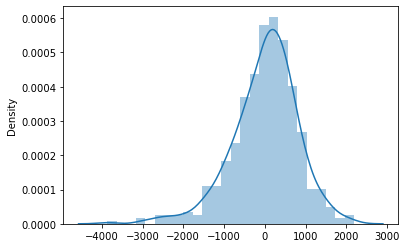

In [405]:
sbn.distplot(rem)

## 4. Prediction

In [406]:
var=['atemp','hum','windspeed']
df_test[var]=scaler.transform(df_test[var])
df_test.head()

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
468,1,0,0,0.536771,0.518248,0.422104,7460,0,1,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0.704203,0.843709,0.479765,4788,0,1,0,...,0,0,0,0,0,0,1,0,0,0
302,0,0,0,0.317998,0.642765,0.386287,3331,0,0,1,...,0,0,0,0,0,0,0,0,1,0
355,0,0,1,0.455552,0.780592,0.062325,3068,1,0,0,...,1,0,0,0,0,0,0,0,0,0
515,1,0,1,0.724915,0.507943,0.433030,7338,0,1,0,...,0,0,0,0,0,0,1,0,0,0


**Now take out cnt as target variable**

In [407]:
y_test=df_test.pop('cnt')

**now remove column which we dropped during our VIF analysis and get X_test .**

In [408]:
X_test=df_test[vif_data['Feature'].values]

In [409]:
X_test.head()

,yr,workingday,atemp,windspeed,spring,Mon,light rain,mist cloudy,Dec,Mar,Nov,Sep
468,1,0,0.536771,0.422104,0,1,0,0,0,0,0,0
148,0,0,0.704203,0.479765,0,0,0,0,0,0,0,0
302,0,0,0.317998,0.386287,0,0,0,0,0,0,0,0
355,0,1,0.455552,0.062325,1,0,0,1,1,0,0,0
515,1,1,0.724915,0.433030,0,0,0,0,0,0,0,0


In [410]:
#add constant
X_test_sm=sm.add_constant(X_test)

C:\Users\Whiz.Ai\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [411]:
X_test_sm.head()

,const,yr,workingday,atemp,windspeed,spring,Mon,light rain,mist cloudy,Dec,Mar,Nov,Sep
468,1.0,1,0,0.536771,0.422104,0,1,0,0,0,0,0,0
148,1.0,0,0,0.704203,0.479765,0,0,0,0,0,0,0,0
302,1.0,0,0,0.317998,0.386287,0,0,0,0,0,0,0,0
355,1.0,0,1,0.455552,0.062325,1,0,0,1,1,0,0,0
515,1.0,1,1,0.724915,0.433030,0,0,0,0,0,0,0,0


In [412]:
#predict
y_test_predict=lr_model.predict(X_test_sm)

In [413]:
#evaluate 
r2_score(y_true=y_test,y_pred=y_test_predict)

0.8177797748120933

**we can see with test case r2_score is 0.81 and our train  model had r2 score 0.82 which is almost same so  our model has generalized well on test set** 

We can see our equation for best fit line is: 
cnt=2832.7176 + yr *(2020.7377) + workingday*(402.8544) +
+atemp*(2608.2382)+windspeed*(-856.4688) +	spring*1374.7411+Mon*442.1064+light rain*-2230.3584+mist cloudy*-672.9060	
+Dec*-365.8445 +	Mar*465.0052+ Nov*-733.8351+Sep*504.1235

**Overall we have decent model, but we also acknowledge that there is scope of improvment of model:

We can try to build non linear model for future scope . 